In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install tensorflow_model_optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Found 225 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/10
2/2 [==============================] - 149s 53s/step - loss: 0.6270 - accuracy: 0.5778 - val_loss: 0.7280 - val_accuracy: 0.4933
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.2336 - accuracy: 0.8667 - val_loss: 0.6940 - val_accuracy: 0.4933
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 0.2673 - accuracy: 0.8667 - val_loss: 0.6938 - val_accuracy: 0.5067
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 0.2105 - accuracy: 0.8667 - val_loss: 0.7356 - val_accuracy: 0.5067
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.2052 - accuracy: 0.8311 - val_loss: 0.7446 - val_accuracy: 0.5067
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 0.1898 - accuracy: 0.8667 - val_loss: 0.7734 - val_accuracy: 0.5067
Epoch 7/10
2/2 [==============================] - 4s 3s/step - loss: 0.1890 - accuracy: 0.866

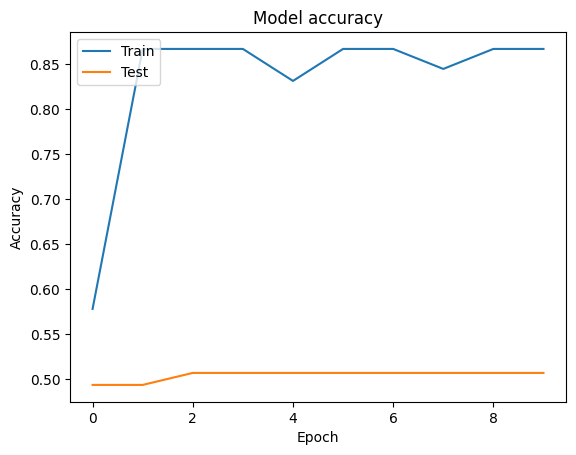

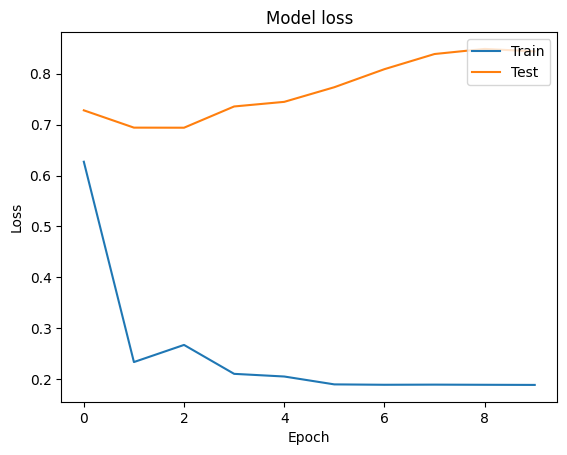

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow_model_optimization.sparsity import keras as sparsity
import matplotlib.pyplot as plt

# Define data directories and parameters
train_data_dir = '/content/drive/MyDrive/train'
validation_data_dir = '/content/drive/MyDrive/test'
img_width, img_height = 224, 224  # Dimensions to which the images will be resized
batch_size = 128
num_classes = 2  # number of output classes

# Instantiate data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define pruning configuration
pruning_params = {
    'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.0, final_sparsity=0.5, begin_step=2000, end_step=10000)
}

# Apply pruning to the model
pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)

# Compile the pruned model
pruned_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add pruning callback
callbacks = [sparsity.UpdatePruningStep()]

# Train the pruned model
history = pruned_model.fit(train_generator,
                           epochs=10,
                           validation_data=validation_generator,
                           callbacks=callbacks)

# Evaluate the pruned model
score = pruned_model.evaluate(validation_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation set
y_pred = pruned_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Save the trained model
model.save('/content/drive/MyDrive/tensorflowmodal/model.h5')


2/2 [==============================] - 4s 413ms/step
Confusion Matrix:
[[ 0 74]
 [ 0 76]]


2/2 [==============================] - 1s 415ms/step


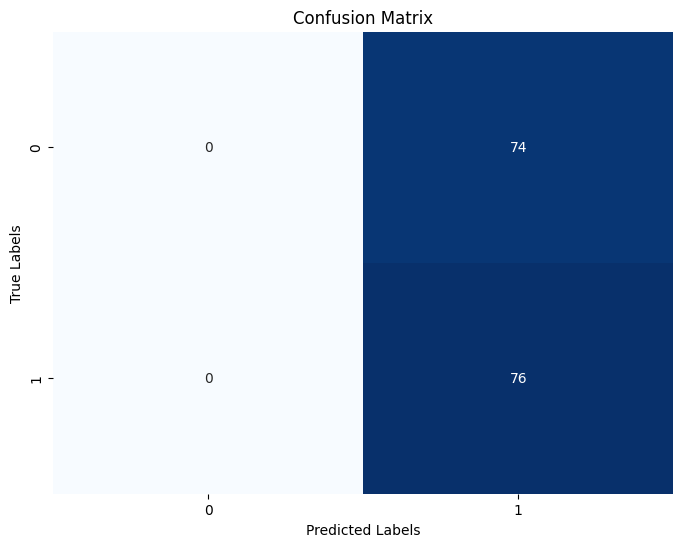

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for the validation set
y_pred = pruned_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [8]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [1]:
pip install tensorflow.keras.models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/tensorflowmodal/model.h5')

# Define the labels
labels = ['Real', 'Fake']

# Load the test video
video_path = '/content/drive/MyDrive/fakenew.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = '/content/drive/MyDrive/tensorflowmodal/output_video.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process each frame of the video
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))
    normalized_frame = resized_frame / 255.0
    expanded_frame = np.expand_dims(normalized_frame, axis=0)

    # Make predictions
    predictions = model.predict(expanded_frame)
    predicted_label = labels[np.argmax(predictions)]

    # Overlay the predicted label on the frame
    cv2.putText(frame, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Write the frame to the output video
    out.write(frame)

    # Save processed frames as images
    cv2.imwrite(f'/content/drive/MyDrive/tensorflowmodal/frame_{frame_count}.jpg', frame)
    frame_count += 1

# Release the video capture and writer objects
cap.release()
out.release()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/path/to/saved/model.h5')

# Define the labels
labels = ['Real', 'Fake']

# Load the test video
video_path = '/content/drive/MyDrive/fakenew.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = '/path/to/save/output_video.avi'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (224, 224))
    normalized_frame = resized_frame / 255.0
    expanded_frame = np.expand_dims(normalized_frame, axis=0)

    # Make predictions
    predictions = model.predict(expanded_frame)
    predicted_label = labels[np.argmax(predictions)]

    # Overlay the predicted label on the frame
    cv2.putText(frame, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Write the frame to the output video
    out.write(frame)

# Release the video capture and writer objects
cap.release()
out.release()


In [ ]:
import cv2
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/path/to/saved/model.h5')

# Define the labels
labels = ['Real', 'Fake']

# Function to process the video frames and make predictions
def process_video():
    video_path = filedialog.askopenfilename(filetypes=[("Video files", "*.mp4")])
    if not video_path:
        return

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Create a window to display the video
    window = tk.Toplevel()
    window.title("Video Player")

    # Create a canvas to display the frames
    canvas = tk.Canvas(window, width=frame_width, height=frame_height)
    canvas.pack()

    # Process each frame of the video
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Preprocess the frame
        resized_frame = cv2.resize(frame, (224, 224))
        normalized_frame = resized_frame / 255.0
        expanded_frame = np.expand_dims(normalized_frame, axis=0)

        # Make predictions
        predictions = model.predict(expanded_frame)
        predicted_label = labels[np.argmax(predictions)]

        # Overlay the predicted label on the frame
        cv2.putText(frame, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Convert the frame to RGB format for displaying in Tkinter
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_pil = Image.fromarray(frame_rgb)
        frame_tk = ImageTk.PhotoImage(frame_pil)

        # Display the frame on the canvas
        canvas.create_image(0, 0, anchor=tk.NW, image=frame_tk)
        canvas.update()

    # Release the video capture object
    cap.release()

# Create the main window
root = tk.Tk()
root.title("Video Predictor")

# Button to select and process the video
select_button = tk.Button(root, text="Select Video", command=process_video)
select_button.pack()

# Run the Tkinter event loop
root.mainloop()
